In [1]:
import os
import numpy as np

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask

import zipfile

import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

import config as cfg

### Instantiate sentinel api
Replace user and password with your own credential used to login with [copernicus scihub](https://scihub.copernicus.eu/dhus)

In [2]:
api = SentinelAPI(cfg.wikiart['user'], cfg.wikiart['password'], 'https://scihub.copernicus.eu/dhus')

### Query products from the area of interest

In [3]:
footprint = geojson_to_wkt(geojson_obj=read_geojson(os.getcwd() + '/map.geojson'))

In [45]:
products = api.query(footprint,
                     date = ('20200201', '20200220'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10))
len(products)

4

In [5]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['beginposition'], ascending=[False])
products_gdf_sorted.head()

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
90fb1035-96c0-40fc-81b5-2e3cba8ee73f,S2A_MSIL2A_20200217T155521_N0214_R011_T17NMJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-17T15:55:21.024Z, Instrument: MS...",2020-02-17 15:55:21.024,2020-02-17 15:55:21.024,2020-02-18 01:14:05.713,24318,11,...,02.14,Level-2A,S2MSI2A,Sentinel-2,944.43 MB,S2A_MSIL2A_20200217T155521_N0214_R011_T17NMJ_2...,S2A_OPER_MSI_L1C_TL_MTI__20200217T204520_A0243...,S2A_MSIL2A_20200217T155521_N0214_R011_T17NMJ_2...,90fb1035-96c0-40fc-81b5-2e3cba8ee73f,"MULTIPOLYGON (((-81.90601 7.14793, -80.91162 7..."
108fe378-dc18-42b8-a495-3a203c3c9497,S2B_MSIL2A_20200212T155519_N0214_R011_T17NMJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-12T15:55:19.024Z, Instrument: MS...",2020-02-12 15:55:19.024,2020-02-12 15:55:19.024,2020-02-12 21:39:41.430,15338,11,...,02.14,Level-2A,S2MSI2A,Sentinel-2,900.25 MB,S2B_MSIL2A_20200212T155519_N0214_R011_T17NMJ_2...,S2B_OPER_MSI_L1C_TL_MTI__20200212T185623_A0153...,S2B_MSIL2A_20200212T155519_N0214_R011_T17NMJ_2...,108fe378-dc18-42b8-a495-3a203c3c9497,"MULTIPOLYGON (((-81.90601 7.14793, -80.91162 7..."
b660065c-a8aa-4f9b-9d11-e9093386f7c3,S2A_MSIL2A_20200207T155521_N0214_R011_T17NNJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-07T15:55:21.024Z, Instrument: MS...",2020-02-07 15:55:21.024,2020-02-07 15:55:21.024,2020-02-07 22:54:40.770,24175,11,...,02.14,Level-2A,S2MSI2A,Sentinel-2,866.92 MB,S2A_MSIL2A_20200207T155521_N0214_R011_T17NNJ_2...,S2A_OPER_MSI_L1C_TL_SGS__20200207T191435_A0241...,S2A_MSIL2A_20200207T155521_N0214_R011_T17NNJ_2...,b660065c-a8aa-4f9b-9d11-e9093386f7c3,"MULTIPOLYGON (((-80.36096 7.14813, -80.35684 7..."
f36aadd8-f10f-4aaf-a61c-8351244d0761,S2A_MSIL2A_20200207T155521_N0214_R011_T17NMJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-07T15:55:21.024Z, Instrument: MS...",2020-02-07 15:55:21.024,2020-02-07 15:55:21.024,2020-02-07 22:54:26.606,24175,11,...,02.14,Level-2A,S2MSI2A,Sentinel-2,892.13 MB,S2A_MSIL2A_20200207T155521_N0214_R011_T17NMJ_2...,S2A_OPER_MSI_L1C_TL_SGS__20200207T191435_A0241...,S2A_MSIL2A_20200207T155521_N0214_R011_T17NMJ_2...,f36aadd8-f10f-4aaf-a61c-8351244d0761,"MULTIPOLYGON (((-81.90601 7.14793, -80.91162 7..."


In [6]:
products_gdf_sorted['producttype'].unique()

array(['S2MSI2A'], dtype=object)

### Dowloading Products
Download (most recent) 1 product from the area of interest

In [10]:
target_dir = 'data'

number_of_products = 1

for i in range(number_of_products):  
    image_uuid = products_gdf_sorted['uuid'][i]
    prod_download = api.download(image_uuid, directory_path=target_dir)
    filename = prod_download['title']+ '.zip'
    filepath = os.path.join(target_dir, filename)
    with zipfile.ZipFile(filepath,"r") as zip_ref:
        zip_ref.extractall(target_dir)

Downloading: 100%|██████████| 990M/990M [39:36<00:00, 417kB/s]   
MD5 checksumming: 100%|██████████| 990M/990M [00:02<00:00, 430MB/s] 


In [13]:
prod_download['title']

'S2A_MSIL2A_20200217T155521_N0214_R011_T17NMJ_20200217T211047'

### Read sentinel-2 satellite image

In [7]:
# set the path for the downloaded data

file_dir = '/Users/wentingjiang/Downloads/data/S2A_MSIL2A_20200217T155521_N0214_R011_T17NMJ_20200217T211047.SAFE/GRANULE/L2A_T17NMJ_A024318_20200217T155946/IMG_DATA/R10m'

In [46]:
image = rasterio.open(file_dir +'/T17NMJ_20200217T155521_TCI_10m.jp2', driver='JP2OpenJPEG')

In [47]:
### check the resolution

xres = (image.bounds.right - image.bounds.left) / image.width
yres = (image.bounds.top - image.bounds.bottom) / image.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

10.0 10.0
Are the pixels square: True


In [10]:
image.bounds.right

509760.0

In [11]:
image.bounds.left

399960.0

### Plot the sallite image

In [12]:
tci = image.read(1)

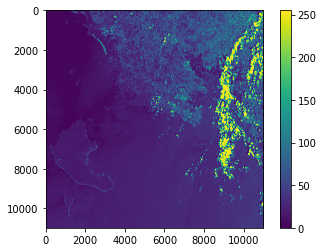

In [13]:
fig = plt.imshow(tci) # cmap='jet')
plt.colorbar()

# Display the results.
plt.show()

## Manipulate the image

In [48]:
tci.shape

(10980, 10980)

In [49]:
## get a small area out of the image
small_tci = tci[2000:4000, 6000:8000]

In [50]:
small_tci.shape

(2000, 2000)

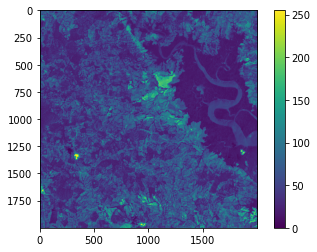

In [51]:
fig = plt.imshow(small_tci)
plt.colorbar()

# Display the results.
plt.show()

### create band ratio: Vegetation index

In [52]:
green = rasterio.open(file_dir +'/T17NMJ_20200217T155521_B03_10m.jp2', 
                      driver='JP2OpenJPEG').read(1)

In [53]:
nir = rasterio.open(file_dir +'/T17NMJ_20200217T155521_B08_10m.jp2', driver='JP2OpenJPEG').read(1)

In [25]:
green = green[2000:4000, 6000:8000]
nir = nir[2000:4000, 6000:8000]

In [26]:
NDWI = (green - nir) / (green + nir)

###### In most cases, NDVI values between 0.2 and 0.4 correspond to areas with sparse vegetation; moderate vegetation tends to vary between 0.4 and 0.6; anything above 0.6 indicates the highest possible density of green leaves.

In [35]:
ndvi = NDWI.copy()

In [36]:
ndvi[ndvi > 0.4] = 1
ndvi[ndvi < 0.4] = 0

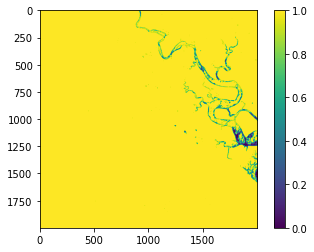

In [38]:
fig = plt.imshow(ndvi)
plt.colorbar()

# Display the results.
plt.show()

### Downsampling the image

In [40]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [42]:
downsampled = rebin(ndvi, (10, 10))

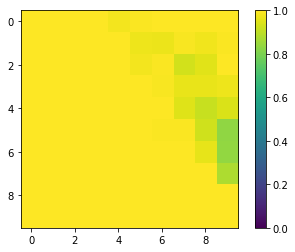

In [44]:
# plot the image again
fig = plt.imshow(downsampled) #, cmap='jet')
plt.colorbar()
plt.clim(0,1)
# Display the results.
plt.show()